In [31]:
import tensorflow as tf
pretrained_base = tf.keras.models.load_model('inceptionv1')


KeyboardInterrupt: 

In [ ]:
pretrained_base.trainable = False


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

ds_train = image_dataset_from_directory(

    'train',
    labels='inferred',
    label_mode='binary',
    image_size=[128,128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
            )
ds_valid = image_dataset_from_directory(

    'valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128,128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
            )

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [ ]:
# data pipline
def convert_to_float(image,label):
    image=tf.image.convert_image_dtype(image,dtype=tf.float32)
    return image,label

In [ ]:
AUTOTUNE=tf.data.experimental.AUTOTUNE
ds_train=(
    ds_train
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE))


ds_valid=(
    ds_valid
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [ ]:
from tensorflow import keras
from tensorflow.python.keras import layers
model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense(6,activation='relu'),
    layers.Dense(1,activation='sigmoid'),]
)

In [ ]:
optimizer = tf.keras.optimizers.Adam(epsilon=0.01)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [ ]:
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30,
)


Epoch 1/30
80/80 [==============================] - 157s 2s/step - loss: 0.5223 - binary_accuracy: 0.7340 - val_loss: 0.4123 - val_binary_accuracy: 0.8254
Epoch 2/30
80/80 [==============================] - 140s 2s/step - loss: 0.4091 - binary_accuracy: 0.8190 - val_loss: 0.3825 - val_binary_accuracy: 0.8343
Epoch 3/30
80/80 [==============================] - 174s 2s/step - loss: 0.3823 - binary_accuracy: 0.8327 - val_loss: 0.3698 - val_binary_accuracy: 0.8398
Epoch 4/30
80/80 [==============================] - 184s 2s/step - loss: 0.3650 - binary_accuracy: 0.8431 - val_loss: 0.3625 - val_binary_accuracy: 0.8436
Epoch 5/30
80/80 [==============================] - 179s 2s/step - loss: 0.3515 - binary_accuracy: 0.8495 - val_loss: 0.3569 - val_binary_accuracy: 0.8454
Epoch 6/30
80/80 [==============================] - 174s 2s/step - loss: 0.3403 - binary_accuracy: 0.8558 - val_loss: 0.3507 - val_binary_accuracy: 0.8485
Epoch 7/30
80/80 [==============================] - 172s 2s/step - los

<Axes: >

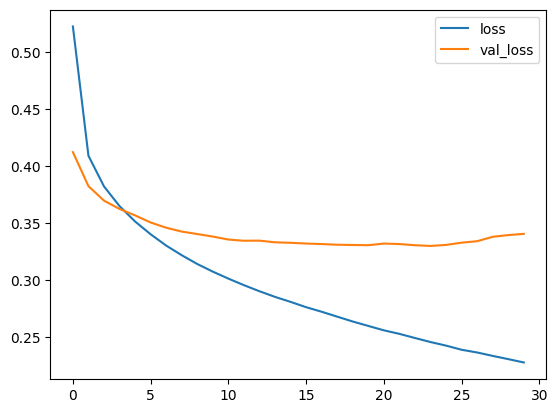

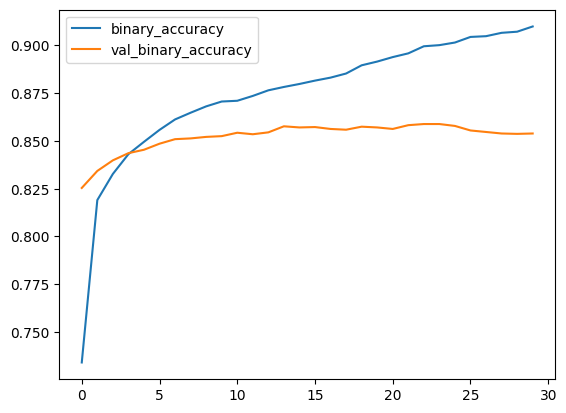

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()


In [62]:
import tensorflow as tf

kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
])


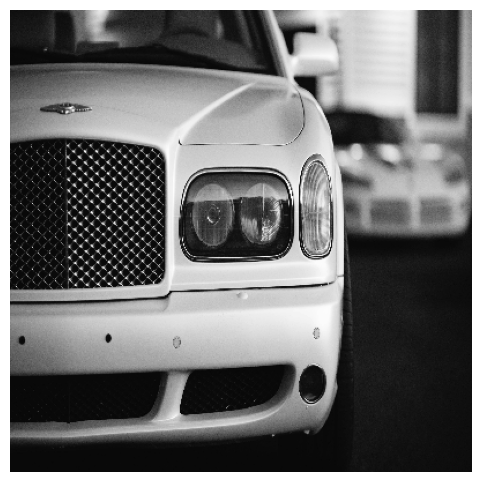

In [97]:
import matplotlib.pyplot as plt

image="car_illus.jpg"
image=tf.io.read_file(image)
image = tf.io.decode_jpeg(image,channels=1)
image = tf.image.resize(image,size=[400,400])

image=tf.image.convert_image_dtype(image,dtype=tf.float32)
image=tf.expand_dims(image,axis=0)

img = tf.squeeze(image).numpy()
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

kernel = tf.reshape(kernel,[*kernel.shape,1,1])
kernel = tf.cast(kernel,dtype=tf.float32)


In [98]:
import matplotlib.pyplot as plt
conv_fn=tf.nn.conv2d
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME',

)

plt.imshow(
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.show()


InvalidArgumentError: {{function_node __wrapped__Conv2D_device_/job:localhost/replica:0/task:0/device:CPU:0}} convolution filter must be 4-dimensional: [3,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1] [Op:Conv2D]